<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/bc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras


(18775, 102)
(18775, 99)
(13564, 98) (13564, 98)
(2394, 98) (2394, 98)
(11868, 98)
(2394, 98)
Epoch 1/500
371/371 [==============================] - 2s 4ms/step - loss: 0.6905 - binary_accuracy: 0.5371 - val_loss: 0.6895 - val_binary_accuracy: 0.5371
Epoch 2/500
371/371 [==============================] - 1s 3ms/step - loss: 0.6824 - binary_accuracy: 0.5627 - val_loss: 0.6736 - val_binary_accuracy: 0.5731
Epoch 3/500
371/371 [==============================] - 1s 4ms/step - loss: 0.6731 - binary_accuracy: 0.5824 - val_loss: 0.6639 - val_binary_accuracy: 0.5961
Epoch 4/500
371/371 [==============================] - 1s 3ms/step - loss: 0.6670 - binary_accuracy: 0.5915 - val_loss: 0.6524 - val_binary_accuracy: 0.6215
Epoch 5/500
371/371 [==============================] - 1s 4ms/step - loss: 0.6606 - binary_accuracy: 0.6059 - val_loss: 0.6495 - val_binary_accuracy: 0.6197
Epoch 6/500
371/371 [==============================] - 1s 4ms/step - loss: 0.6544 - binary_accuracy: 0.6027 - val_loss: 0

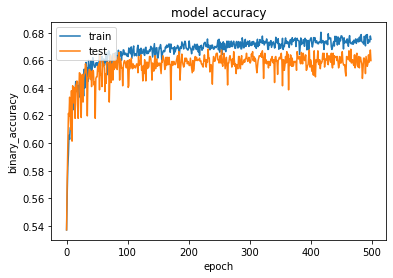

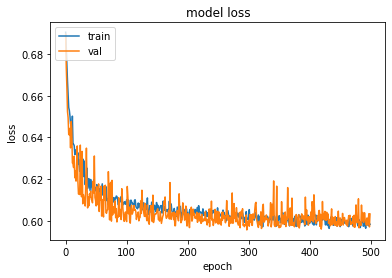

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras






CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
RESULTS=['0','1']


train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)
print(train.shape)

train['team_one_name']=pd.Categorical(train['team_one_name']).codes
train['team_two_name']=pd.Categorical(train['team_two_name']).codes

#train_y=train.pop('Result')
#test_y=test.pop('Result')
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')

'''
train.pop('playerAAGrenadeDmg')
train.pop('playerABGrenadeDmg')
train.pop('playerACGrenadeDmg')
train.pop('playerADGrenadeDmg')
train.pop('playerAEGrenadeDmg')
train.pop('playerBAGrenadeDmg')
train.pop('playerBBGrenadeDmg')
train.pop('playerBCGrenadeDmg')
train.pop('playerBDGrenadeDmg')
train.pop('playerBEGrenadeDmg')

train.pop('playerAAKast')
train.pop('playerABKast')
train.pop('playerACKast')
train.pop('playerADKast')
train.pop('playerAEKast')
train.pop('playerBAKast')
train.pop('playerBBKast')
train.pop('playerBCKast')
train.pop('playerBDKast')
train.pop('playerBEKast')








train.pop('playerAAKD')
train.pop('playerABKD')
train.pop('playerACKD')
train.pop('playerADKD')
train.pop('playerAEKD')
train.pop('playerBAKD')
train.pop('playerBBKD')
train.pop('playerBCKD')
train.pop('playerBDKD')
train.pop('playerBEKD')

train.pop('playerAAAdr')
train.pop('playerABAdr')
train.pop('playerACAdr')
train.pop('playerADAdr')
train.pop('playerAEAdr')
train.pop('playerBAAdr')
train.pop('playerBBAdr')
train.pop('playerBCAdr')
train.pop('playerBDAdr')
train.pop('playerBEAdr')



#


train.pop('playerAADpr')
train.pop('playerABDpr')
train.pop('playerACDpr')
train.pop('playerADDpr')
train.pop('playerAEDpr')
train.pop('playerBADpr')
train.pop('playerBBDpr')
train.pop('playerBCDpr')
train.pop('playerBDDpr')
train.pop('playerBEDpr')

train.pop('playerAAKpr')
train.pop('playerABKpr')
train.pop('playerACKpr')
train.pop('playerADKpr')
train.pop('playerAEKpr')
train.pop('playerBAKpr')
train.pop('playerBBKpr')
train.pop('playerBCKpr')
train.pop('playerBDKpr')
train.pop('playerBEKpr')

train.pop('playerAAImpact')
train.pop('playerABImpact')
train.pop('playerACImpact')
train.pop('playerADImpact')
train.pop('playerAEImpact')
train.pop('playerBAImpact')
train.pop('playerBBImpact')
train.pop('playerBCImpact')
train.pop('playerBDImpact')
train.pop('playerBEImpact')

train.pop('playerAAHs')
train.pop('playerABHs')
train.pop('playerACHs')
train.pop('playerADHs')
train.pop('playerAEHs')
train.pop('playerBAHs')
train.pop('playerBBHs')
train.pop('playerBCHs')
train.pop('playerBDHs')
train.pop('playerBEHs')

train.pop('playerAARating')
train.pop('playerABRating')
train.pop('playerACRating')
train.pop('playerADRating')
train.pop('playerAERating')
train.pop('playerBARating')
train.pop('playerBBRating')
train.pop('playerBCRating')
train.pop('playerBDRating')
train.pop('playerBERating')
'''
print(train.shape)
target_column = ['Result'] 
predictors = list(set(list(train.columns))-set(target_column))
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
norm = StandardScaler()
train[predictors]=norm.fit_transform(train[predictors])
train[predictors] = scaler.fit_transform(train[predictors])


#train[predictors] = train[predictors]/train[predictors].max()

X = train[predictors].values
y = train[target_column].values
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)#32 #888

lof = LocalOutlierFactor(contamination=0.15,n_neighbors=1)
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
print(X_train.shape, X_train.shape)

yhat = lof.fit_predict(X_test)
# select all rows that are not outliers
mask = yhat != -1
X_test, y_test = X_test[mask, :], y_test[mask]
print(X_test.shape, X_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=5) # 0.25 x 0.8 = 0.2

print(X_train.shape) 
print(X_test.shape)
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)#tohle nepoužívám, protože mám sigmoid a výsledky můžou být jen 1 nebo 0, takže to není nutné dělat  z toho kategorizační vektory
count_classes = y_test.shape[1]


model = Sequential()#66?
model.add(Dense(18, activation='relu'))#input layer je už v modelu defaultně
model.add(keras.layers.Dropout(0.2))#20% inputů dropne abz se příliš nespoléhala na vybrané inputy
model.add(Dense(9, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))#binary sigmoid     categorical softmax


model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9), #keras.optimizers.Adadelta(learning_rate=0.01) momentum 0.9
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), #from_logits=True/False
              metrics=tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None))#metrics=['accuracy'] je to jedno accuracy se vnitřně přetransformuje na binary accuracy, kvůli binary crossentropy loss funkci

#[tf.keras.metrics.BinaryAccuracy()]
#adadelta-lr 0.04 78 (bez grenadedmg a kast) 20 4 1 sigmoid binary crossentropy  1000 epochs a 64 batch size a 9 rs
#adadelta-lr 0.015 98 30 15 5 2 rs9 testsize 0.15 64batchsize  Accuracy on test data: 0.690095841884613% 
#adadelta-lr 0.02 98 35 15 2 rs17 testsize 0.15 64batchsize 0.15 test rate Accuracy on test data: 0.6890308856964111% 
#record accuracy má Adadelta(0.01), categorical_crossentropy 98,50,2 1000 epochs a 32 batch size
#record accuracy má adadelta(0.01) 86 random state 32 batch size a 1000 epochs  test accuracy: 0.674478
#adadelta zatím top
#binary_crossentropy
#categorical_crossentropy
# categorical_hinge 0.677
# hinge 0.667
# MeanAbsoluteError 0.654, 
# MeanAbsolutePercentageError 0.6814 



history = model.fit(X_train, y_train, epochs=540,batch_size=32,validation_data=(X_val, y_val))#validační data pro změny při tréninku sítě

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))#úspěšnost na trénovacím setu   


pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)# zkusit změnit verbose zde a nahoře na 1 a 2 mělo by to zobrazovat více údajů při tréninku
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))#úspěšnost na testovacím setu



plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#poznatky-vypadá to, že grenade damage každého hráče je nadbytečná a síť bez této informace vykazuje lepší výsledky





In [7]:
Xnew=np.array([[1.43,2.58,28,57,0.62,0.58,0.5,0.5,1.17,0.58,0.75,1.02,79.7,0.71,0.56,1.22,4.4,1.13,0.63,0.68,1.19,75.4,0.74,0.4,1.18,2.4,1.1,0.66,0.71,1.07,79.3,0.69,0.53,1.05,5.6,1.03,0.7,0.76,0.96,71.2,0.65,0.6,0.92,6.4,1.02,0.66,0.72,0.9,74.0,0.64,0.44,0.97,10.1,1.2,0.67,0.76,1.12,84.4,0.8,0.6,1.21,4.7,1.18,0.64,0.7,1.28,78.8,0.78,0.33,1.21,2.7,1.03,0.7,0.69,0.98,75.9,0.68,0.51,0.97,4.1,0.98,0.7,0.7,0.94,70.8,0.62,0.54,0.89,6.7,0.85,0.7,0.66,0.82,60.6,0.53,0.36,0.75,4.9],
               [1.73,1.96,36,23,0.69,0.63,0.539,0.521,1.33,0.55,0.78,1.23,84.9,0.85,0.38,1.53,2.8,1.12,0.67,0.72,1.15,77.7,0.71,0.58,1.06,4.3,1.11,0.65,0.72,1.03,81.2,0.68,0.46,1.05,3.6,1.1,0.71,0.69,1.19,81.1,0.72,0.59,1.01,4.4,0.97,0.62,0.71,0.84,62.9,0.61,0.57,0.99,1.9,1.17,0.64,0.72,1.15,84.2,0.74,0.49,1.16,8.3,1.14,0.63,0.72,1.13,74.4,0.75,0.28,1.19,1.4,1.07,0.68,0.69,1.1,76.5,0.69,0.56,1.02,4.4,1.02,0.64,0.72,0.92,69.7,0.64,0.51,1.00,4.2,0.91,0.68,0.68,0.84,66.1,0.57,0.55,0.83,6.1],
               [3.84,1.21,87,25,0.55,0.58,0.5,0.516,1.19,0.64,0.68,1.38,79.3,0.81,0.3,1.27,2.6,1.01,0.73,0.67,1.05,73.5,0.69,0.54,0.94,3.1,0.97,0.74,0.68,0.9,77.8,0.61,0.43,0.83,7.9,0.89,0.68,0.66,0.76,66.1,0.58,0.47,0.86,7.1,0.88,0.67,0.66,0.8,63.0,0.52,0.47,0.77,3.1,1.21,0.56,0.73,1.17,78.7,0.76,0.25,1.34,3.5,1.11,0.68,0.69,1.14,81.8,0.72,0.48,1.06,5.5,1.01,0.64,0.67,0.94,72.7,0.65,0.59,1.02,4.7,0.89,0.66,0.66,0.77,66.0,0.56,0.47,0.84,6.1,1.055,0.6350000000000001,0.6875,1.005,74.8,0.6725,0.44749999999999995,1.0650000000000002,4.949999999999999],
               [1.44,2.62,9,18,0.0,0.83,0.462,0.491,1.19,0.67,0.61,1.42,89.1,0.75,0.26,1.12,6.8,0.8,0.75,0.67,0.8,57.3,0.51,0.39,0.68,2.5,0.8,0.67,0.71,0.45,57.2,0.45,0.56,0.68,4.8,0.98,0.72,0.61,1.12,73.8,0.71,0.43,0.99,4.7,0.76,0.73,0.61,0.64,57.7,0.45,0.52,0.62,4.8,1.21,0.64,0.71,1.33,83.7,0.8,0.5,1.25,2.4,1.12,0.56,0.7,1.05,73.7,0.7,0.26,1.26,4.2,1.11,0.64,0.7,1.11,81.4,0.72,0.5,1.12,7.5,1.09,0.62,0.74,0.96,75.3,0.68,0.4,1.10,7.5,1.05,0.59,0.69,0.94,71.1,0.66,0.44,1.12,4.1],
               [2.08,1.65,41,83,0.52,0.62,0.457,0.5,1.16,0.6,0.72,1.13,76.4,0.73,0.28,1.22,2.0,1.1,0.7,0.7,1.12,79.6,0.72,0.5,1.03,3.8,1.03,0.71,0.69,1.05,75.7,0.65,0.55,0.91,4.8,1.0,0.69,0.66,1.02,72.6,0.69,0.61,1.00,3.1,0.92,0.66,0.7,0.8,64.5,0.56,0.53,0.85,4.3,1.27,0.62,0.81,1.19,83.8,0.77,0.53,1.23,2.5,1.14,0.63,0.74,1.18,71.7,0.71,0.29,1.14,2.4,1.13,0.59,0.71,1.11,76.2,0.7,0.42,1.18,4.3,1.02,0.66,0.67,0.98,74.8,0.64,0.51,0.97,6.1,1.1400000000000001,0.625,0.7324999999999999,1.1150000000000002,76.625,0.705,0.4375,1.13,3.8249999999999997],
               [1.36,3.00,2,16,1.0,1.0,0.535,0.5,1.36,0.58,0.77,1.49,91.1,0.77,0.47,1.33,5.3,1.24,0.65,0.69,1.41,84.1,0.83,0.6,1.26,6.8,1.19,0.65,0.69,1.35,82.0,0.77,0.42,1.18,6.8,1.01,0.56,0.71,0.82,62.1,0.62,0.19,1.10,2.4,0.88,0.54,0.69,0.62,51.8,0.46,0.46,0.86,8.4,1.75,0.47,0.86,1.88,110.2,1.06,0.56,2.25,3.0,1.4,0.49,0.77,1.62,75.7,0.78,0.28,1.60,5.4,1.15,0.55,0.8,0.83,71.2,0.69,0.54,1.25,5.6,1.05,0.59,0.69,0.89,75.8,0.65,0.36,1.10,3.6,0.71,0.67,0.71,0.21,46.7,0.39,0.3,0.59,4.6]
])
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
norm = StandardScaler()

Xnew=norm.fit_transform(Xnew)
Xnew = scaler.fit_transform(Xnew)

#model= keras.models.load_model("my_model3.h5")

ynew=(model.predict([Xnew]))
#ynew=(model.predict_classes([Xnew]))
print(ynew)

Consider rewriting this model with the Functional API.
[[0.326396  ]
 [0.61012185]
 [0.98432124]
 [0.41374007]
 [0.928668  ]
 [0.1440181 ]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save('/content/save/my_model3.h5')

In [ ]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
pd.set_option("expand_frame_repr", True)
pd.set_option("large_repr", "info")
model.layers[0].get_weights()[0][98]



In [ ]:
from sklearn import metrics
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6683375104427736


In [ ]:
import shap
import xgboost

CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','team_one_name','team_two_name']
shap.initjs()
#explainer = shap.Explainer(model.predict, X_train)
#shap_values = explainer.shap_values(np.array([[1.8,1.9,26,23,0.63,0.64,0.509,0.591,1.16,0.68,0.7,1.26,84.3,0.75,0.5,1.11,7.4,1.13,0.64,0.72,1.11,78.0,0.72,0.57,1.13,3.2,1.0,0.67,0.69,0.95,69.3,0.64,0.58,0.95,4.2,0.99,0.65,0.69,0.95,67.7,0.62,0.58,0.94,3.3,1.07,0.66,0.7,1.0675000000000001,74.825,0.6825,0.5575,1.0325000000000002,4.525,1.23,0.6,0.75,1.26,79.4,0.77,0.31,1.29,3.4,1.24,0.61,0.77,1.15,82.8,0.82,0.52,1.35,3.4,1.14,0.62,0.73,1.11,76.1,0.72,0.5,1.16,5.2,1.0,0.68,0.7,0.98,70.2,0.61,0.51,0.90,3.9,0.98,0.69,0.69,0.96,71.7,0.6,0.48,0.87,5.3]])

keras_explainer = shap.DeepExplainer(model, shap.sample(X_train, 10))
keras_shap_values = keras_explainer.shap_values(X_test)

values = keras_shap_values[0]
base_values = [keras_explainer.expected_value[0]]*len(keras_shap_values[0])

tmp = shap.Explanation(values = np.array(values, dtype=np.float32),
                       base_values = np.array(base_values, dtype=np.float32),
                       data=np.array(X_train),
                       feature_names=CSV_COLUMN_NAMES2)

#shap.plots.waterfall(tmp[5])
#shap.plots.bar(tmp,max_display=98)
shap.summary_plot(tmp, X_test,max_display=100)